In [ ]:
#Library Importing
from pyspark.sql import SparkSession
from pyspark.context import SparkContext
from pyspark.sql.functions import *
from pyspark.sql.types import *
from datetime import date, timedelta, datetime
import time

# INITIALIZING SPARKSESSION

In [ ]:
#Initialization of a Spark Session
sc = SparkSession.builder.appName("PySparkExample")\
    .config ("spark.sql.shuffle.partitions", "50") \
    .config("spark.driver.maxResultSize","5g") \
    .config ("spark.sql.execution.arrow.enabled", "false")\
    .getOrCreate()

# CREATING DATAFRAMES

In [ ]:
#Read from json, parquet, txt, csv formatted files.
#Creates a spark data frame called as raw_data.
%time

#JSON
dataframe = sc.read.json('nyt2.json')

#TXT FILES
# dataframe_txt = sc.read.text('text_data.txt')

#CSV FILES
# dataframe_csv = sc.read.csv('csv_data.csv')

#PARQUET FILES
# dataframe_parquet = sc.read.load('parquet_data.parquet')


In [ ]:
# dataframe = sc.read.json('nyt2.json')

In [ ]:
dataframe.show(10)

# DUPLICATE VALUES

In [ ]:
dataframe_dropdup = dataframe.dropDuplicates()

In [ ]:
dataframe_dropdup.show(10)

In [ ]:
dataframe.columns

# QUERIES

# Select

In [ ]:
# Select Operation
dataframe.select("author").show(10) #Show all entries in title column

In [ ]:
dataframe.select("author", "title", "rank", "price").show(10)  #Show all entries in title, author, rank, price columns

# When

In [ ]:
# Show title and assign 0 or 1 depending on title
dataframe.select("title", when(dataframe.title != 'ODD HOURS', 1).otherwise(0)).show(10)

In [ ]:
# Show rows with specified authors if in the given options
dataframe [dataframe.author.isin("John Sandford","Emily Giffin")].show(5)

# Like

In [ ]:
# Show author and title is TRUE if title has " THE " word in titles
dataframe.select("author", "title", dataframe.title.like("% THE %")).show(15)

# StartsWith - EndsWith

In [ ]:
dataframe.select("author", "title", dataframe.title.startswith("THE")).show(5)
dataframe.select("author", "title", dataframe.title.endswith("NT")).show(5)

# Substring

In [ ]:
dataframe.select(dataframe.author.substr(1, 6).alias("title")).show()

In [ ]:
dataframe.select(dataframe.author.substr(1, 3).alias("title")).show(5)
dataframe.select(dataframe.author.substr(3, 6).alias("title")).show(5)
dataframe.select(dataframe.author.substr(1, 6).alias("title")).show(5)

# INSPECT DATA

In [ ]:
# Returns dataframe column names and data types
dataframe.dtypes

In [ ]:
# Displays the content of dataframe
dataframe.show()

In [ ]:
# Return first n rows
dataframe.head(3)

In [ ]:
# Returns first row
dataframe.first()

In [ ]:
# Return first n rows
dataframe.take(5)

In [ ]:
# Computes summary statistics
dataframe.describe().show()

In [ ]:
# Returns columns of dataframe
dataframe.columns

In [ ]:
# Counts the number of rows in dataframe
dataframe.count()

In [ ]:
# Counts the number of distinct rows in dataframe
dataframe.distinct().count()

In [ ]:
# Prints plans including physical and logical
dataframe.explain(3)

In [ ]:
from pyspark.sql.functions import corr
dataframe.select(corr("author","title")).show()

# ADD, UPDATE & REMOVE COLUMNS

In [ ]:
# Lit() is required while we are creating columns with exact values.

dataframe = dataframe.withColumn('new_column', lit('This is a new column'))
dataframe.show(5)

In [ ]:
# Update column 'amazon_product_url' with 'URL'
dataframe = dataframe.withColumnRenamed('amazon_product_url', 'URL')
dataframe.show(5)

In [ ]:
dataframe_remove = dataframe.drop("publisher", "published_date").show(5)
dataframe_remove2 = dataframe.drop(dataframe.publisher).drop(dataframe.published_date).show(5)

# GROUPBY

In [ ]:
# Group by author, count the books of the authors in the groups
dataframe.groupBy("rank_last_week").count().show(10)

# FILTERING

In [ ]:
# Filtering entries of title
# Only keeps records having value 'THE HOST'
dataframe.filter(dataframe["title"] == 'THE HOST').show(5)

# MISSING AND REPLACING VALUES

In [ ]:
# Replace null values
dataframe.na.fill(50).show(5)

In [ ]:
# Return new dataframe restricting rows with null values
dataframe.na.drop().show(5)

In [ ]:
# Return new dataframe replacing one value with another
dataframe.na.replace(15, 25).show(5)

In [ ]:
dataframe.na.replace(['_id', 'Unique_ID'], ['amazon_product_url', 'URL'], 'name').show(5)

# REPARTITIONING

In [ ]:
# Dataframe with 10 partitions

dataframe.repartition(10).rdd.getNumPartitions()

In [ ]:
# Dataframe with 1 partition

dataframe.coalesce(1).rdd.getNumPartitions()

# RUNNING SQL QUERIES PROGRAMMATICALLY

# Registering DataFrames 

In [ ]:
dataframe.createGlobalTempView("nyt2")

In [ ]:
dataframe.createTempView("bestsellers")

In [ ]:
dataframe.createOrReplaceTempView("nyt2")

# Registering Tables

In [ ]:
# Registering a table
dataframe.registerTempTable("df")

In [ ]:
sc.sql("select * from df").show(3)

In [ ]:
sc.sql("select \
               CASE WHEN description LIKE '%love%' THEN 'Love_Theme' \
               WHEN description LIKE '%hate%' THEN 'Hate_Theme' \
               WHEN description LIKE '%happy%' THEN 'Happiness_Theme' \
               WHEN description LIKE '%anger%' THEN 'Anger_Theme' \
               WHEN description LIKE '%horror%' THEN 'Horror_Theme' \
               WHEN description LIKE '%death%' THEN 'Criminal_Theme' \
               WHEN description LIKE '%detective%' THEN 'Mystery_Theme' \
               ELSE 'Other_Themes' \
               END Themes \
       from df").groupBy('Themes').count().show()

# OUTPUT

# Data Structures

In [ ]:
# Converting dataframe into an RDD
rdd_convert = dataframe.rdd


In [ ]:
# Converting dataframe into a RDD of string
dataframe.toJSON().first()


# Converting to Pandas

In [46]:
# Obtaining contents of df as Pandas dataFrame
#!sudo python3 -m pip install pandas
import pandas as pd
pdf = dataframe.toPandas()
pdf

,_id,URL,author,bestsellers_date,description,price,published_date,publisher,rank,rank_last_week,title,weeks_on_list,new_column
0,"(5b4aa4ead3089013507db18b,)",http://www.amazon.com/Odd-Hours-Dean-Koontz/dp...,Dean R Koontz,"((1211587200000,),)","Odd Thomas, who can communicate with the dead,...","(None, 27)","((1212883200000,),)",Bantam,"(1,)","(0,)",ODD HOURS,"(1,)",This is a new column
1,"(5b4aa4ead3089013507db18c,)",http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,"((1211587200000,),)",Aliens have taken control of the minds and bod...,"(25.99, None)","((1212883200000,),)","Little, Brown","(2,)","(1,)",THE HOST,"(3,)",This is a new column
2,"(5b4aa4ead3089013507db18d,)",http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,"((1211587200000,),)",A woman's happy marriage is shaken when she en...,"(24.95, None)","((1212883200000,),)",St. Martin's,"(3,)","(2,)",LOVE THE ONE YOU'RE WITH,"(2,)",This is a new column
3,"(5b4aa4ead3089013507db18e,)",http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,"((1211587200000,),)",A Massachusetts state investigator and his tea...,"(22.95, None)","((1212883200000,),)",Putnam,"(4,)","(0,)",THE FRONT,"(1,)",This is a new column
4,"(5b4aa4ead3089013507db18f,)",http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,"((1211587200000,),)",An aging porn queens aims to cap her career by...,"(24.95, None)","((1212883200000,),)",Doubleday,"(5,)","(0,)",SNUFF,"(1,)",This is a new column
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,"(5b4aa4ead3089013507dd959,)",https://www.amazon.com/Clancy-Line-Sight-Jack-...,Mike Maden,"((1530921600000,),)",Jack Ryan Jr. risks his life to protect a woma...,"(None, 0)","((1532217600000,),)",Putnam,"(11,)","(6,)",TOM CLANCY LINE OF SIGHT,"(4,)",This is a new column
10191,"(5b4aa4ead3089013507dd95a,)",https://www.amazon.com/Something-Water-Novel-C...,Catherine Steadman,"((1530921600000,),)",A documentary filmmaker and an investment bank...,"(None, 0)","((1532217600000,),)",Ballantine,"(12,)","(11,)",SOMETHING IN THE WATER,"(5,)",This is a new column
10192,"(5b4aa4ead3089013507dd95b,)",https://www.amazon.com/Little-Fires-Everywhere...,Celeste Ng,"((1530921600000,),)",An artist upends a quiet town outside Cleveland.,"(None, 0)","((1532217600000,),)",Penguin Press,"(13,)","(12,)",LITTLE FIRES EVERYWHERE,"(41,)",This is a new column
10193,"(5b4aa4ead3089013507dd95c,)",https://www.amazon.com/Shelter-Place-Nora-Robe...,Nora Roberts,"((1530921600000,),)",Survivors of a mass shooting outside a mall in...,"(None, 0)","((1532217600000,),)",St. Martin's,"(14,)","(5,)",SHELTER IN PLACE,"(6,)",This is a new column


## Plotting via Pandas
## Pandas has tight integration with matplotlib. ou can plot data directly from your DataFrame using the plot() method:

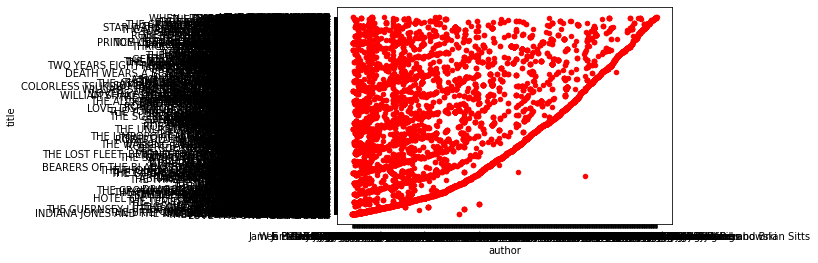

In [47]:
import matplotlib.pyplot as plt
pdf.plot.scatter(x = 'author', y = 'title', color = 'red')
plt.show()

## Plotting alternatives: plotly, seaborn

# Write & Save Files

In [51]:
# Write & Save File in .parquet format (creates a directory with parts)
dataframe.select("author", "title", "rank", "description")\
.write \
.save("Rankings_Descriptions.parquet")

In [ ]:
# Write & Save File in .json format (creates a directory with parts)
dataframe.select("author", "title") \
.write \
.save("Authors_Titles.json",format="json")

# Building Model with SKLearn

In [ ]:
# Obtaining contents of df as Pandas dataFrame
# !sudo python3 -m pip install scikit-learn

# Using Koalas

In [50]:
import databricks.koalas as ks
# Create a Koalas DataFrame from pandas DataFrame
# kdf = ks.from_pandas(pdf)
ks.read_json('nyt2.json').head(5)

,_id,amazon_product_url,author,bestsellers_date,description,price,published_date,publisher,rank,rank_last_week,title,weeks_on_list
0,"(5b4aa4ead3089013507db18b,)",http://www.amazon.com/Odd-Hours-Dean-Koontz/dp...,Dean R Koontz,"((1211587200000,),)","Odd Thomas, who can communicate with the dead,...","(None, 27)","((1212883200000,),)",Bantam,"(1,)","(0,)",ODD HOURS,"(1,)"
1,"(5b4aa4ead3089013507db18c,)",http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,"((1211587200000,),)",Aliens have taken control of the minds and bod...,"(25.99, None)","((1212883200000,),)","Little, Brown","(2,)","(1,)",THE HOST,"(3,)"
2,"(5b4aa4ead3089013507db18d,)",http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,"((1211587200000,),)",A woman's happy marriage is shaken when she en...,"(24.95, None)","((1212883200000,),)",St. Martin's,"(3,)","(2,)",LOVE THE ONE YOU'RE WITH,"(2,)"
3,"(5b4aa4ead3089013507db18e,)",http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,"((1211587200000,),)",A Massachusetts state investigator and his tea...,"(22.95, None)","((1212883200000,),)",Putnam,"(4,)","(0,)",THE FRONT,"(1,)"
4,"(5b4aa4ead3089013507db18f,)",http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,"((1211587200000,),)",An aging porn queens aims to cap her career by...,"(24.95, None)","((1212883200000,),)",Doubleday,"(5,)","(0,)",SNUFF,"(1,)"


## A quick statistical summary of a Koalas DataFrame

# STOPPING SPARK SESSION

In [ ]:
# End Spark Session 
sc.stop()